# Rainfall Prediction - Weather Forecasting
Problem Statement:
Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


Dataset available below




Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
https://github.com/dsrscientist/dataset3

# Loading important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



# Loading dataset

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#There are 8425 rows and 23 columns in this dataset

# Extracting the column names for future reference

In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Preprocessing the dataset

#First checking the null values

In [5]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

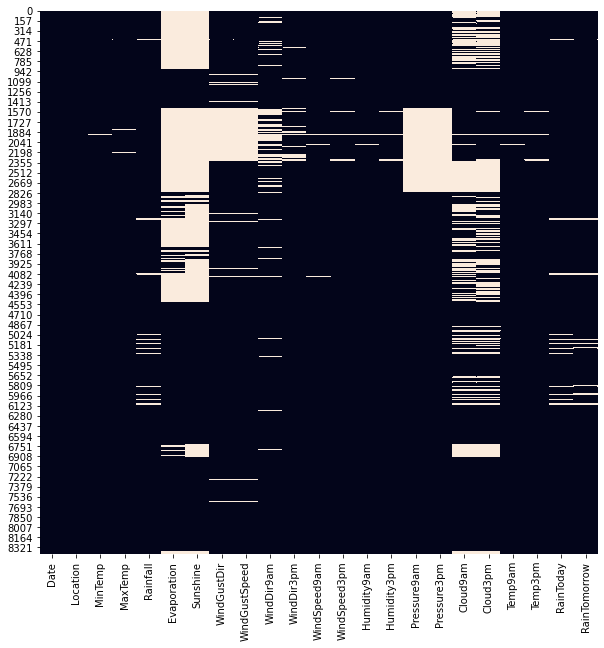

In [7]:
#Checking null values through heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)



In [8]:
#Drop the null values column

df.dropna(inplace=True)

<AxesSubplot:>

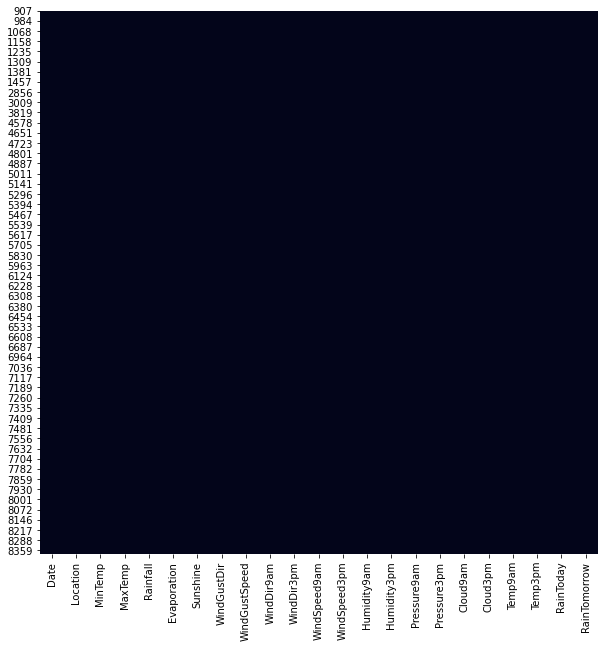

In [10]:
#Checking the null values after dropping 

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False)

In [12]:
#Reset the index since we deleted many records
df.reset_index(drop=True,inplace=True)

In [13]:
#Assess which columns can be used for an ml model, and which ones would simply be to complicated to operate on    

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3790 non-null   object 
 1   Location       3790 non-null   object 
 2   MinTemp        3790 non-null   float64
 3   MaxTemp        3790 non-null   float64
 4   Rainfall       3790 non-null   float64
 5   Evaporation    3790 non-null   float64
 6   Sunshine       3790 non-null   float64
 7   WindGustDir    3790 non-null   object 
 8   WindGustSpeed  3790 non-null   float64
 9   WindDir9am     3790 non-null   object 
 10  WindDir3pm     3790 non-null   object 
 11  WindSpeed9am   3790 non-null   float64
 12  WindSpeed3pm   3790 non-null   float64
 13  Humidity9am    3790 non-null   float64
 14  Humidity3pm    3790 non-null   float64
 15  Pressure9am    3790 non-null   float64
 16  Pressure3pm    3790 non-null   float64
 17  Cloud9am       3790 non-null   float64
 18  Cloud3pm

In [14]:
#Hense drop unwanted columns
df.drop(['Date','Location','WindDir9am','WindDir3pm'],axis=True,inplace=True)

In [15]:
#Check columns now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3790 non-null   float64
 1   MaxTemp        3790 non-null   float64
 2   Rainfall       3790 non-null   float64
 3   Evaporation    3790 non-null   float64
 4   Sunshine       3790 non-null   float64
 5   WindGustDir    3790 non-null   object 
 6   WindGustSpeed  3790 non-null   float64
 7   WindSpeed9am   3790 non-null   float64
 8   WindSpeed3pm   3790 non-null   float64
 9   Humidity9am    3790 non-null   float64
 10  Humidity3pm    3790 non-null   float64
 11  Pressure9am    3790 non-null   float64
 12  Pressure3pm    3790 non-null   float64
 13  Cloud9am       3790 non-null   float64
 14  Cloud3pm       3790 non-null   float64
 15  Temp9am        3790 non-null   float64
 16  Temp3pm        3790 non-null   float64
 17  RainToday      3790 non-null   object 
 18  RainTomo

In [16]:
#Extrapolate meaningful and usable (binary)data from 'WinGustDir' column into 
#fn indicating  'From North'
#fs indicating 'From South'
#fw indicating 'From West'
#fe is IGNORED since if all the other columns are 0 it is automatically assumed from East


In [18]:
def swap1(x):
    if x[0]=='N':
        return 1
    else:
        return 0


In [19]:
def swap2(x):
    if [0]=='S':
        return 1
    else: 
        return 0

In [20]:
def swap3(x):
    if [0]=='W':
        return 1
    else:
        return 0

In [21]:
df['fN']=df['WindGustDir'].apply(swap1)
df['fS']=df['WindGustDir'].apply(swap2)
df['fW']=df['WindGustDir'].apply(swap3)

In [23]:
#view extraplolated information to verify validity
df[['WindGustDir','fN','fS','fW']].head()


,WindGustDir,fN,fS,fW
0,ESE,0,0,0
1,E,0,0,0
2,WSW,0,0,0
3,ENE,0,0,0
4,NNE,1,0,0


In [24]:
#We must now repeat the same to extrapolate meaning from the end direction4
#tN indicating 'to North'
#tS indicating 'to South'
#tW indicating 'to West'
#tE indicating 'to East', this column is not ignored here since sometimes there is no end direction

In [25]:
df['WindGustDir'].loc[0][-1:]#Checking how to call last element of WindGustDir element,[-1:]means last charcter                        


'E'

In [27]:
len(df['WindGustDir'].loc[0])#Checking how to call length of windgustdir element


3

In [33]:
def backswap1(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=='N':
            return 1
        else:
            return 0


In [34]:
def backswap2(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=='E':
            return 1
        else:
            return 0
        

In [37]:
def backswap3(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=='W':
            return 1
        else:
            return 0

In [38]:
def backswap4(x):
    if len(x)==1:
        return 0
    else:
        if x[-1:]=='S':
            return 1
        else:
            return 0

In [39]:
df['tN']=df['WindGustDir'].apply(backswap1)
df['tE']=df['WindGustDir'].apply(backswap2)
df['tW']=df['WindGustDir'].apply(backswap3)
df['tS']=df['WindGustDir'].apply(backswap4)

In [40]:
#View extrapolated information to verify validity
df[['WindGustDir','fN','fS','fW','tN','tE','tW','tS']].head()

,WindGustDir,fN,fS,fW,tN,tE,tW,tS
0,ESE,0,0,0,0,1,0,0
1,E,0,0,0,0,0,0,0
2,WSW,0,0,0,0,0,1,0
3,ENE,0,0,0,0,1,0,0
4,NNE,1,0,0,0,1,0,0


In [41]:
-#Checking preprocessed dataset so far
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3790 non-null   float64
 1   MaxTemp        3790 non-null   float64
 2   Rainfall       3790 non-null   float64
 3   Evaporation    3790 non-null   float64
 4   Sunshine       3790 non-null   float64
 5   WindGustDir    3790 non-null   object 
 6   WindGustSpeed  3790 non-null   float64
 7   WindSpeed9am   3790 non-null   float64
 8   WindSpeed3pm   3790 non-null   float64
 9   Humidity9am    3790 non-null   float64
 10  Humidity3pm    3790 non-null   float64
 11  Pressure9am    3790 non-null   float64
 12  Pressure3pm    3790 non-null   float64
 13  Cloud9am       3790 non-null   float64
 14  Cloud3pm       3790 non-null   float64
 15  Temp9am        3790 non-null   float64
 16  Temp3pm        3790 non-null   float64
 17  RainToday      3790 non-null   object 
 18  RainTomo

In [43]:
#Removing 'WindGustDir' column, now that we extrapolated information we longer need it in dataset
df.drop('WindGustDir',axis=1,inplace=True)


In [44]:
#Checking data type of 'RainToday' and 'RainTomorrow' columns
df[['RainToday','RainTomorrow']].head()

,RainToday,RainTomorrow
0,Yes,Yes
1,Yes,Yes
2,Yes,No
3,No,No
4,No,Yes


In [45]:
#Our logistic regression model will not work with boolean/categorical data, we need to convert this to binary
marker1 =pd.get_dummies(df['RainToday'],drop_first=True)
marker2=pd.get_dummies(df['RainTomorrow'],drop_first=True)


In [46]:
df['RainToday']=marker1
df['RainTomorrow']=marker2


In [47]:
df[['RainToday','RainTomorrow']].head()

,RainToday,RainTomorrow
0,1,1
1,1,1
2,1,0
3,0,0
4,0,1


In [48]:
df.info()#Checking all the columns now


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3790 non-null   float64
 1   MaxTemp        3790 non-null   float64
 2   Rainfall       3790 non-null   float64
 3   Evaporation    3790 non-null   float64
 4   Sunshine       3790 non-null   float64
 5   WindGustSpeed  3790 non-null   float64
 6   WindSpeed9am   3790 non-null   float64
 7   WindSpeed3pm   3790 non-null   float64
 8   Humidity9am    3790 non-null   float64
 9   Humidity3pm    3790 non-null   float64
 10  Pressure9am    3790 non-null   float64
 11  Pressure3pm    3790 non-null   float64
 12  Cloud9am       3790 non-null   float64
 13  Cloud3pm       3790 non-null   float64
 14  Temp9am        3790 non-null   float64
 15  Temp3pm        3790 non-null   float64
 16  RainToday      3790 non-null   uint8  
 17  RainTomorrow   3790 non-null   uint8  
 18  fN      

# Preparing the model by importing important libraries

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [50]:
#Split dataset into input and output columns (x) & (y)

In [51]:
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']


In [52]:
#Split dataset into 2 new datasets, Train Data (x) & Test Data (y)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
#Train the model with input and desired output from train data

In [55]:
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [56]:
#Model is now created, we can now test it by only feeding input from Test Data

In [57]:
pred=lm.predict(x_test)


In [58]:
#calling Evaluation Libraries
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
#Evaluate accuracy of your model by comparing your Predicted Output vs. Actual Output for Test Data

In [60]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       856
           1       0.76      0.54      0.63       281

    accuracy                           0.84      1137
   macro avg       0.81      0.74      0.77      1137
weighted avg       0.84      0.84      0.84      1137

